In [1]:
import statsbombpy
from statsbombpy import sb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

import numpy as np

# Function

In [2]:
def plot_pitch() :
    
    fig,ax = plt.subplots(figsize=(10.4,6.8))
    ax.axis('off') # this hides the x and y ticks
    
    ly1 = [0,0,68,68,0]
    lx1 = [0,104,104,0,0]
    
    plt.plot(lx1,ly1,color="black",zorder=5)
    
    ly2 = [13.84,13.84,54.16,54.16] 
    lx2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color="black",zorder=5)

    ly3 = [13.84,13.84,54.16,54.16] 
    lx3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color="black",zorder=5)
    
    #goals#
    ly4 = [30.34,30.34,37.66,37.66]
    lx4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color="black",zorder=5)

    ly5 = [30.34,30.34,37.66,37.66]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black",zorder=5)
    
    #6 yard boxes#
    ly6 = [24.84,24.84,43.16,43.16]
    lx6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color="black",zorder=5)

    ly7 = [24.84,24.84,43.16,43.16]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black",zorder=5)
    
    

    #Halfway line, penalty spots, and kickoff spot

    vcy5 = [0,68] 
    vcx5 = [52,52]
    plt.plot(vcx5,vcy5,color="black",zorder=5)


    plt.scatter(93,34,color="black",zorder=5)
    plt.scatter(11,34,color="black",zorder=5)
    plt.scatter(52,34,color="black",zorder=5)
    
    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=2,alpha=1)
    
    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=2,alpha=1)



    ## Rectangles in boxes
    rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="white", zorder=1,alpha=1)
    rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="white", zorder=1,alpha=1)



    ## Pitch rectangle

    #rec3 = plt.Rectangle((-1,-1), 106,70,color=pitch,zorder=1,alpha=1)



    #ax.add_artist(rec3)
    #ax.add_artist(circle1)
    #ax.add_artist(circle2)
    #ax.add_artist(rec1)
    #ax.add_artist(rec2)

    ax.add_artist(circle3)

    #we defined ax after we imported matplotlib.pyplot#

In [3]:
def nb_goals_season(events, player_name) : 
    
    
    events_shot = events[events.player == player_name].shot.dropna() #only shots of the player
    
    goals = pd.Series(index = events_shot.index) #empty pd Series --> receives goals
    
    nb_goals = 0
    for i in events_shot.index : 
         if events_shot.loc[i]['outcome']['name'] == 'Goal' :
                nb_goals += 1
    
    return nb_goals

In [4]:
def nb_shots_season(events, name_player) : 
    
    #all events of the division of one season in particular
    
    
    events_shot = events[events.player == name_player].shot.dropna() #only shots of the player
    
    return events_shot.shape[0]

In [5]:
def xg_season(events, player_name) : 
    
    #all events of the division of one season in particular
    events_xg = events[events.player == player_name].shot.dropna()
    total_xg = 0
    
    for i in events_xg.index : 
        xg = events_xg.loc[i]['statsbomb_xg']
        total_xg += xg
        
    return total_xg

In [6]:
def shot_location(events, name_player) : 
    
    events_shot = events[events.player == name_player].shot.dropna() #only shots of the player
    shot_location = []
    
    for i in events_shot.index : 
            shot_location.append(events.location.loc[i])
    
    return shot_location

In [7]:
def shot_location_under_pressure(events, name_player) :
    
    #only shots of the player
    events_shot = events[(events.player == name_player) & (events.under_pressure == True)].shot.dropna() 
    
    shot_location_under_pressure = []
    
    for i in events_shot.index : 
            shot_location_under_pressure.append(events.location.loc[i])
    
    return shot_location_under_pressure

In [8]:
def goal_location(events, name_player) :
    
    events_shot = events[events.player == name_player].shot.dropna() #only shots of the player
    goal_location = []
    
    for i in events_shot.index : 
         if events_shot.loc[i]['outcome']['name'] == 'Goal' :
                goal_location.append(events.location.loc[i])
    
    return goal_location

In [9]:
def goal_location_under_pressure(events, name_player) :
    
    events_shot = events[(events.player == name_player) & (events.under_pressure == True)].shot.dropna() #only shots of the player
    goal_location_under_pressure = []
    
    for i in events_shot.index : 
         if events_shot.loc[i]['outcome']['name'] == 'Goal' :
                goal_location_under_pressure.append(events.location.loc[i])
    
    return goal_location_under_pressure

In [10]:
def missed_shot_location(events, name_player) : 
    
    events_shot = events[events.player == name_player].shot.dropna() #only shots of the player
    missed_shot_location = []
    
    for i in events_shot.index : 
         if events_shot.loc[i]['outcome']['name'] != 'Goal' :
                missed_shot_location.append(events.location.loc[i])
    
    return missed_shot_location

In [11]:
def minutes_season(events, name_player, club_name) :
    
    id_match = list(set(events[events.player == name_player].match_id))
    total_minutes = 0
    ERROR = 0
    
    for match in id_match :
        
        BEGIN = False
        SUB = False
        
        #MINUTE BEGINNING
        
        try :
            if name_player in list(sb.lineups(match_id = match)[club_name].player_name) : #player begins the match on the pitch
                begin_minute = 0
                BEGIN = True
        except TypeError:
            ERROR += 1
            
        else : #player gets on the pitch during the match
            for i in events[events.match_id == match].substitution.dropna().index :
                if events[events.match_id == match].substitution.dropna().loc[i]['replacement']['name'] == name_player :
                    begin_minute = events.minute.loc[i]
                    SUB = True
                    
                    
        #MINUTE END
        #player get off the pitch
        if events[(events.player == name_player) & (events.match_id == match)].substitution.dropna().shape[0] > 0 :
            end_minute = events[(events.player == name_player) & (events.match_id == match)].minute.iloc[0]
        
        else : #player goes until the end of the match
            end_minute = 90
            
        #TOTAL PLAYED 
        if BEGIN == True or SUB == True :
            minutes_played = end_minute - begin_minute
            
            
        #DOES NOT PLAY  
        if BEGIN == False and SUB == False : #player does not play
            minutes_played = 0
            
        total_minutes += minutes_played
        
    return total_minutes

In [12]:
def classify_shots(df_shots, percentage = False) :
    
    matrix = np.zeros((6,8))
    
    step_w = 104/8
    width = [0]
    while width[-1] < 104 :
        width.append(width[-1] + step_w)
        
    step_h = 68/6
    height = [0]
    while height[-1] < 68 :
        height.append(height[-1] + step_h)
    
    for k in range(df_shots.shape[0]) :
        #print(k/df_shots.shape[0]*100)
        x = df_shots.x.loc[k]
        y = df_shots.y.loc[k]

        
        for i in range(len(width)-1) : 
            for j in range(len(height)-1) :
                if width[i] <= x < width[i+1] and height[j] <= y < height[j+1] :
                    matrix[j, i] += 1
    
    nb_shots = df_shots.shape[0]
    
    if percentage == True : 
        return matrix / nb_shots * 100
    else : 
        return matrix

In [13]:
def plot_heat_map_repartition(matrix_repartition) : 
    
    step_w = 104/8
    width = [0]
    while width[-1] < 104 :
        width.append(width[-1] + step_w)
        
    step_h = 68/6
    height = [0]
    while height[-1] < 68 :
        height.append(height[-1] + step_h)
        
    color_palette = sns.light_palette("green", n_colors = 20)
        
    for i in range(len(width)-1) :
        for j in range(len(height)-1) :
            percent_goals = round(matrix_repartition[j, i])
            
            if percent_goals >= 10 :
                value_balance = int(str(int(percent_goals))[-1])

                gap = 100 #a big figure
                if abs(value_balance - 0) < gap :
                    gap = abs(value_balance - 0)
                    choice = 0
                if abs(value_balance - 10) < gap :
                    gap = abs(value_balance - 10)
                    choice = 10
                if abs(value_balance - 5) < gap :
                    choice = 5

                if choice == 5 or choice == 0 :
                    rounded_percent_goals = int(str(percent_goals)[0] + str(choice))
                elif choice == 10 :
                    rounded_percent_goals = int(str(int(str(percent_goals)[0])+1) + str(0))

                i_color = int(rounded_percent_goals / 5)
                
            elif percent_goals < 10 : 
                gap = 100  #a big figure

                if abs(percent_goals - 10) < gap :
                    gap = abs(percent_goals - 10)
                    choice = 10
                if abs(percent_goals - 5) < gap : 
                    choice = 5
                    gap = abs(percent_goals - 5)
                if abs(percent_goals - 0) < gap : 
                    choice = 0

                i_color = int(choice/5)

            
            color = color_palette[i_color]
            
            text_x = width[i] + step_w/2
            text_y = height[len(height)-2-j] + step_h/2
            
            rectangle = plt.Rectangle((width[i], height[len(height)-2-j]), step_w, step_h, angle=0.0, fc = color)
            #diametre = percent_goals * (4-1) /(50-0)
            #circle = plt.Circle((text_x,text_y), diametre, color = color)
            plt.gca().add_patch(rectangle)
            #plt.gca().add_patch(circle)
            
            
            plt.text(text_x, text_y, str(int(round(percent_goals, 2)))+ ' %', horizontalalignment='center', fontsize = 13)

In [14]:
def plot_heat_map_ratio(matrix_ratio, matrix_numerator) : 
    
    step_w = 104/8
    width = [0]
    while width[-1] < 104 :
        width.append(width[-1] + step_w)
        
    step_h = 68/6
    height = [0]
    while height[-1] < 68 :
        height.append(height[-1] + step_h)
        
    color_palette = sns.light_palette("green", n_colors = 20)
        
    for i in range(len(width)-1) :
        for j in range(len(height)-1) :
            percent_goals = round(matrix_ratio[j, i])
            
            if percent_goals >= 10 :
                value_balance = int(str(int(percent_goals))[-1])

                gap = 100 #a big figure
                if abs(value_balance - 0) < gap :
                    gap = abs(value_balance - 0)
                    choice = 0
                if abs(value_balance - 10) < gap :
                    gap = abs(value_balance - 10)
                    choice = 10
                if abs(value_balance - 5) < gap :
                    choice = 5

                if choice == 5 or choice == 0 :
                    rounded_percent_goals = int(str(percent_goals)[0] + str(choice))
                elif choice == 10 :
                    rounded_percent_goals = int(str(int(str(percent_goals)[0])+1) + str(0))

                i_color = int(rounded_percent_goals / 5)
                
            elif percent_goals < 10 : 
                gap = 100  #a big figure

                if abs(percent_goals - 10) < gap :
                    gap = abs(percent_goals - 10)
                    choice = 10
                if abs(percent_goals - 5) < gap : 
                    choice = 5
                    gap = abs(percent_goals - 5)
                if abs(percent_goals - 0) < gap : 
                    choice = 0

                i_color = int(choice/5)

            
            color = color_palette[i_color]
            
            text_x = width[i] + step_w/2
            text_y = height[len(height)-2-j] + step_h/2
            
            nb_numerator = matrix_numerator[j, i]
            
            #rectangle = plt.Rectangle((width[i], height[len(height)-2-j]), step_w, step_h, angle=0.0, fc = color)
            diametre = nb_numerator * (5-1.5) /(np.amax(matrix_numerator)- np.amin(matrix_numerator))
            circle = plt.Circle((text_x,text_y), diametre, color = color)
            #plt.gca().add_patch(rectangle)
            plt.gca().add_patch(circle)
            
            
            plt.text(text_x, text_y, str(int(round(percent_goals, 2)))+ ' %', horizontalalignment='center', fontsize = 13)

In [15]:
def degree_performance(df_xg_career, season) :
    
    
    mean_ratio = df_xg_career[df_xg_career.begin_season < season].coef_performance.mean()
    
    ratio_season = df_xg_career[df_xg_career.begin_season == season].coef_performance.iloc[0]
    
    if ratio_season / mean_ratio >= 1 :
        performance = ((ratio_season / mean_ratio) - 1) * 100
    else :
        performance = - (1 - ratio_season/mean_ratio) * 100
        
    return performance

In [16]:
def degree_performance_career(df_xg_career, season) : 
    
    mean_ratio = df_xg_career.coef_performance.mean()
    
    ratio_season = df_xg_career[df_xg_career.begin_season == season].coef_performance.iloc[0]
    
    if ratio_season / mean_ratio >= 1 :
        performance = ((ratio_season / mean_ratio) - 1) * 100
    else :
        performance = - (1 - ratio_season/mean_ratio) * 100
        
    return performance

# Analysis

In [17]:
competitions = sb.competitions()
la_liga = competitions[competitions.competition_name == 'La Liga']
la_liga.head()

credentials were not supplied. open data access only


competition_id  season_id country_name competition_name competition_gender  \
3              11          4        Spain          La Liga               male   
4              11          1        Spain          La Liga               male   
5              11          2        Spain          La Liga               male   
6              11         27        Spain          La Liga               male   
7              11         26        Spain          La Liga               male   

  season_name               match_updated             match_available  
3   2018/2019  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
4   2017/2018  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
5   2016/2017  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
6   2015/2016  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
7   2014/2015  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756

Evolution of number of shots and number of goals 

In [18]:
goals_career = []
shots_career = []
minutes_career = []
xg_career = []
    
for season in la_liga.season_name : 
    print(season)
    
    dic_competition = {
    "country": 'Spain',
    "division": 'La Liga',
    "season": season,
    "gender": 'male'
    }
    
    events = sb.competition_events(competition=dic_competition) 
    
    goals_career.append(nb_goals_season(events, 'Lionel Andrés Messi Cuccittini'))
    shots_career.append(nb_shots_season(events, 'Lionel Andrés Messi Cuccittini'))
    minutes_career.append(minutes_season(events, 'Lionel Andrés Messi Cuccittini', 'Barcelona'))
    xg_career.append(xg_season(events, 'Lionel Andrés Messi Cuccittini')) 

2018/2019
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open 

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
2009/2010
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open 

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


In [21]:
data = {'seasons' : la_liga.season_name[::-1], 'goals' : goals_career[::-1]}  
df_goals_career = pd.DataFrame(data = data)
df_goals_career.head()

data = {'seasons' : la_liga.season_name[::-1], 'shots' : shots_career[::-1]}  
df_shots_career = pd.DataFrame(data = data)
df_shots_career.head()

data = {'seasons' : la_liga.season_name[::-1], 'minutes' : minutes_career[::-1]}  
df_minutes_career = pd.DataFrame(data = data)
df_minutes_career.head()

data = {'seasons' : la_liga.season_name[::-1], 'goal per shot' : df_goals_career.goals / df_shots_career.shots}
df_ratio_goals_shots = pd.DataFrame(data = data)

data = {'seasons' : la_liga.season_name[::-1], 'goal per minute' : df_minutes_career.minutes / df_goals_career.goals}
df_ratio_goals_minutes = pd.DataFrame(data = data)

data = {'seasons' : la_liga.season_name[::-1], 'Expected Goals' : xg_career[::-1]}
df_xg_career = pd.DataFrame(data = data)
df_xg_career['coef_performance'] = round(df_goals_career.goals[::-1] / df_xg_career['Expected Goals'], 2)
df_xg_career['over_under'] = df_xg_career['coef_performance'].apply(lambda x: 'over' if x > 1 else 'under')

begin_season = list(range(2004, 2019))
df_xg_career['begin_season'] = begin_season

In [22]:
under_over_perf = []
for season in df_xg_career.begin_season :
    under_over_perf.append(degree_performance(df_xg_career, season))
    
df_xg_career['under_over_performance'] = under_over_perf

In [23]:
under_over_perf = []
for season in df_xg_career.begin_season :
    under_over_perf.append(degree_performance_career(df_xg_career, season))
    
df_xg_career['under_over_performance_career'] = under_over_perf

In [24]:
df_xg_career

seasons  Expected Goals  coef_performance over_under  begin_season  \
17  2004/2005        0.704073              1.42       over          2004   
16  2005/2006        5.499080              1.09       over          2005   
15  2006/2007       10.560425              1.33       over          2006   
14  2007/2008        9.842163              1.02       over          2007   
13  2008/2009       18.768549              1.23       over          2008   
12  2009/2010       24.727924              1.37       over          2009   
11  2010/2011       28.519560              1.09       over          2010   
10  2011/2012       39.611110              1.26       over          2011   
9   2012/2013       24.653702              1.87       over          2012   
8   2013/2014       27.831729              1.01       over          2013   
7   2014/2015       32.461518              1.32       over          2014   
6   2015/2016       24.912974              1.04       over          2015   
5   2016/2017       26.158968              1.41       over          2016   
4   2017/2018       25.460802              1.34       over          2017   
3   2018/2019       23.752842              1.52       over          2018   

    under_over_performance  under_over_performance_career  
17                     NaN                      10.248447  
16              -23.239437                     -15.372671  
15                5.976096                       3.260870  
14              -20.312500                     -20.807453  
13                1.234568                      -4.503106  
12               12.479475                       6.366460  
11              -12.332440                     -15.372671  
10                3.157895                      -2.173913  
9                52.497452                      45.186335  
8               -22.174658                     -21.583851  
7                 4.018913                       2.484472  
6               -18.344040                     -19.254658  
5                12.425249                       9.472050  
4                 5.832321                       4.037267  
3                19.550562                      18.012422

# Vizualisation

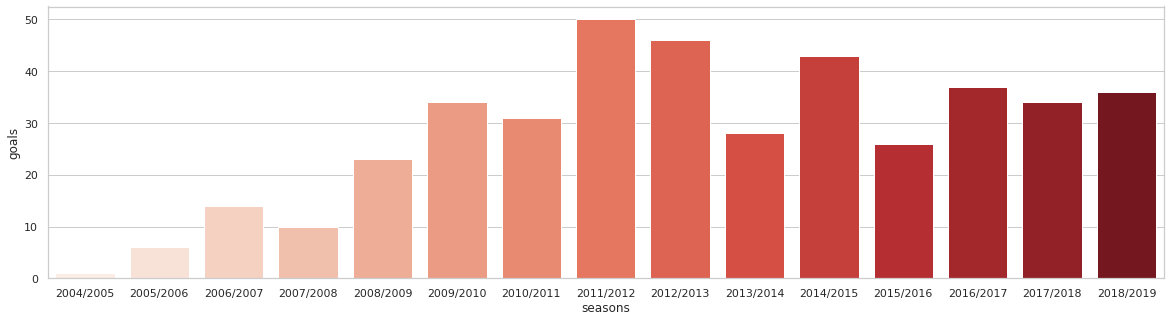

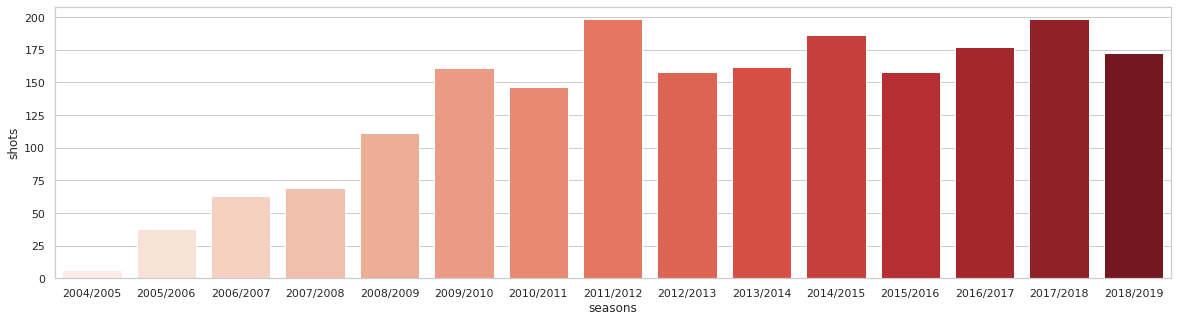

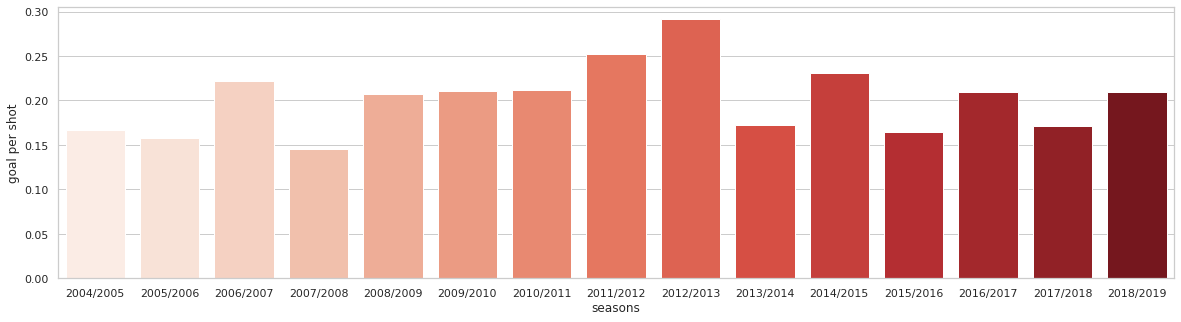

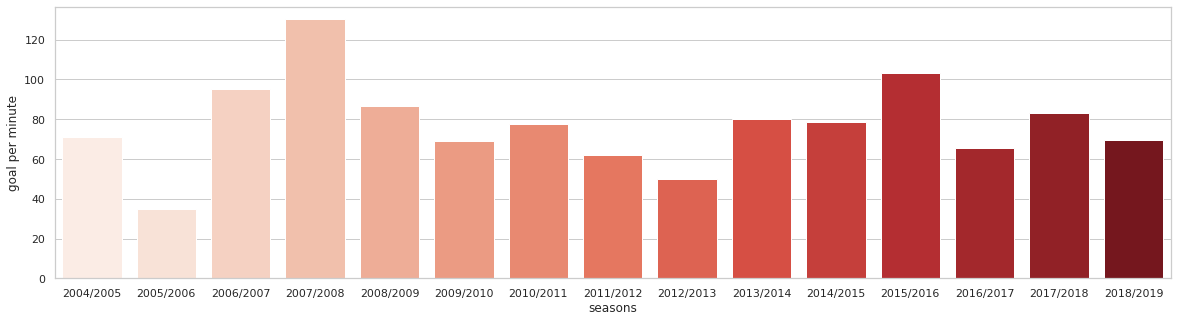

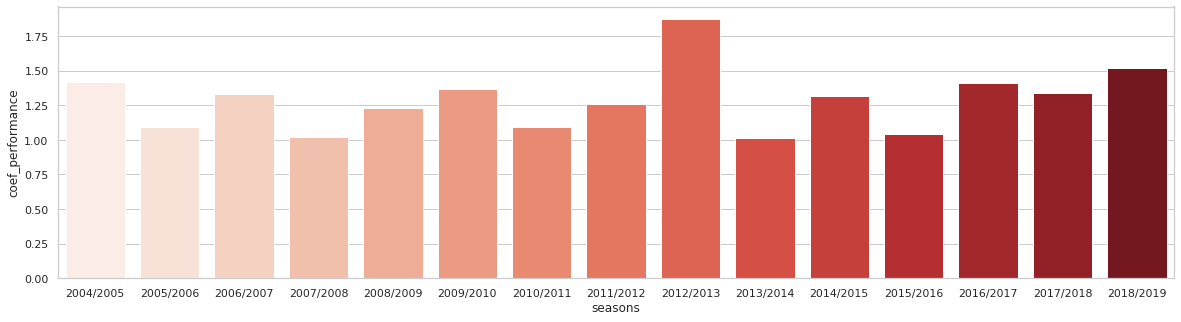

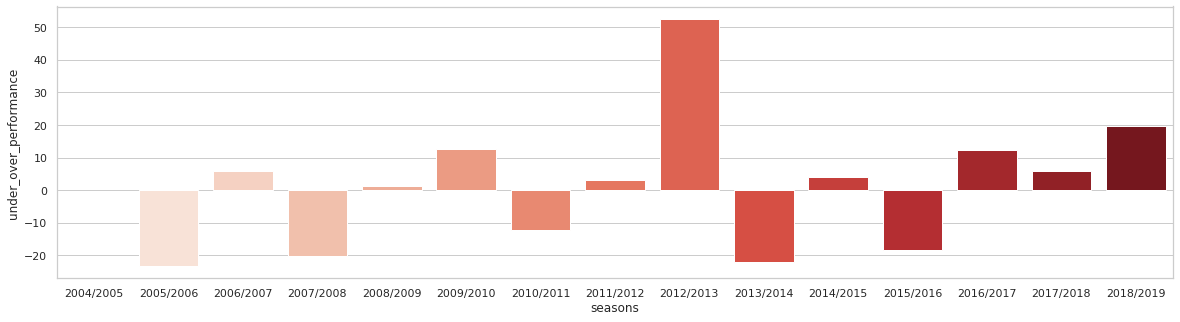

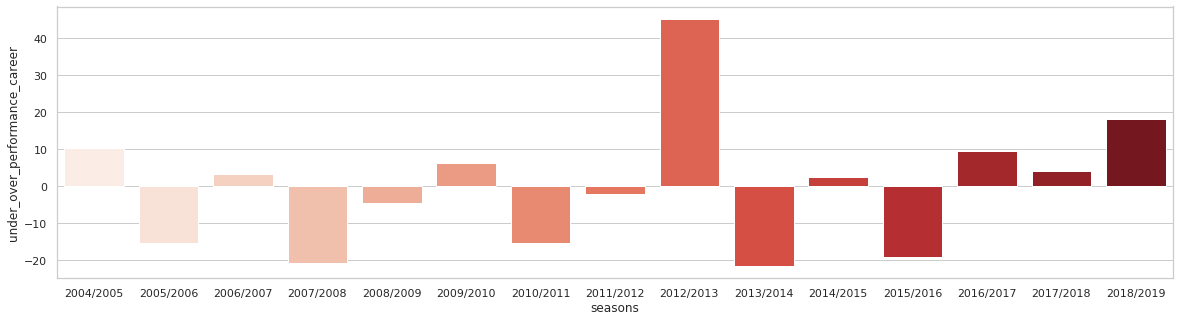

In [25]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_goals_career, x = "seasons", y = 'goals', palette="Reds")

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_shots_career, x = "seasons", y = 'shots', palette="Reds")

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_ratio_goals_shots, x = "seasons", y = 'goal per shot', palette="Reds")

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_ratio_goals_minutes, x = "seasons", y = 'goal per minute', palette="Reds")

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_xg_career, x = 'seasons', y= 'coef_performance', palette = 'Reds')   

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_xg_career, x = 'seasons', y= 'under_over_performance', palette = 'Reds')

plt.figure(figsize=(20,5))
ax = sns.barplot(data = df_xg_career, x = 'seasons', y= 'under_over_performance_career', palette = 'Reds')   

In [ ]:
la_liga.season_name[::-1]